<a href="https://colab.research.google.com/github/mamenaca/TareasMineriaDatos_Semana1/blob/main/2_Regresion/2_ModeloNolineal_EjSinc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings("ignore")

#Ejemplo mínimos cuadrados para regresión y su extensión no lineal

[sklearn.linear model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

Regresor lineal por mínimos cuadrados

\begin{equation}
\omega^* = \arg\min_\omega \|y-Xw\|^2_2
\end{equation}


[sklearn.kernel ridge.KernelRidge](https://scikit-learn.org/stable/modules/generated/sklearn.kernel_ridge.KernelRidge.html)

Regresor rígido kernel



\begin{equation}
\omega^* = \arg\min_\omega \|y-\Phi \omega\|^2_2 + \alpha\|\omega\|^2_2
\end{equation}

\begin{equation}
\omega^* = (\Phi^\top \Phi+\alpha I)^{-1}\Phi^\top y
\end{equation}


\begin{equation}
\omega^* = \Phi^\top(\Phi \Phi^\top+\alpha I)^{-1}y = k(\cdot)^\top(K+\alpha I)^{-1}y
\end{equation}

# Ejercicio 1

- Presente la solución al problema de optimización kernel ridge (Ver [Kernel Ridge Regression](https://web2.qatar.cmu.edu/~gdicaro/10315-Fall19/additional/welling-notes-on-kernel-ridge.pdf) y [material de apoyo](https://github.com/amalvarezme/AnaliticaDatos/blob/master/6_TopicosAvanzados/introKernels.pdf) págs 8 y 9).

$$B= \Phi$$

$$R = I$$ $$P=?$$ factorizar para que quede $\alpha$

## Solución Ejercicio 1

Lo primero es analizar el problema que se va a optimizar:
$$w^*=\stackrel{argmin}{w} L(y,f)+R(f|λ) $$

$$w^*=\stackrel{argmin}{w} \frac{1}{N} ||y-\phi(x) w ||_{2}^{2}+λ||w||^{2}_{2}$$

Luego:

$$\nabla w \{L(y,f)+R(f|λ) \} = \frac{2}{N} [(\phi^T \phi+Nλ) -\phi^T y]$$

Igualando el gradiente a cero y despejando w, se llega a $w^*$ como:

$$           $$

##**Ejemplo** 

- Se pretende generar un modelo de regresión bajo entradas con ruido blanco Gaussiano, con $\mu_\eta=0$, para seguir una función no lineal tipo sinc(x).

- $y = {\rm{sinc}}(x)+\eta$;  
con $\eta\sim p(\eta)=\mathcal{N}(\eta|\mu_\eta,\sigma_\eta^2)=\frac{1}{\sqrt{2\pi\sigma^2_\eta}}\exp\left(\frac{-\|\eta-\mu_\eta\|_2^2}{2\sigma^2_\eta}\right)$

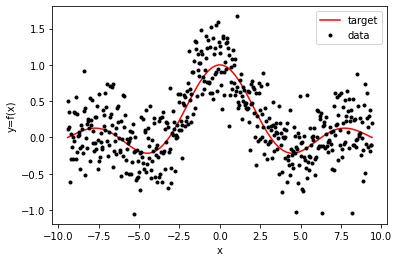

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
N = 500 #número de muestras
X = np.linspace(-3*np.pi,3*np.pi,N) #vector de entrada 
y = np.sinc(X/np.pi) #función sinc -> objetivo
var = 0.1 #varianza del ruido
mue = 0 #media del ruido
noise = mue + np.sqrt(var)*np.random.randn(X.shape[0])#ruido blanco
yn = y + noise #señal co ruido
plt.plot(X,y,'r',label='target' )
plt.plot(X,yn,'k.',label='data')
plt.legend()
plt.xlabel('x')
plt.ylabel('y=f(x)')
plt.show()

**Nota:** $${\rm{sinc}}(\theta)=\frac{\sin(\theta)}{\theta}$$

- Se crean los vectores de entrada y salida tipo aprendizaje de máquina.

In [ ]:
ydata = yn.reshape(-1,1)
Xdata = X.reshape(-1,1)
print(Xdata.shape) # N = 500 muestras, P = 1 atributos
print(ydata.shape) # N = 500, regresion univarida

(500, 1)
(500, 1)


- Se entrenará un modelo de aprendizaje con scikitlearn

(350, 1)
(150, 1)


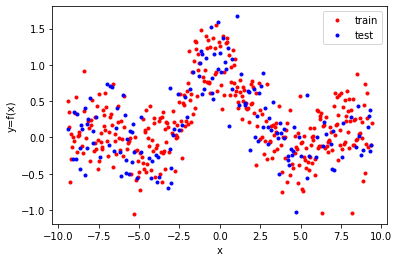

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score, cross_val_predict

X_train, X_test, y_train, y_test = train_test_split(Xdata, ydata,
                                                    test_size=0.3)#particionar train y test

print(X_train.shape)
print(X_test.shape)

plt.plot(X_train,y_train,'r.',label='train' )
plt.plot(X_test,y_test,'b.',label='test')
plt.legend()
plt.xlabel('x')
plt.ylabel('y=f(x)')
plt.show()

- Se utilizará el modelo [KernelRidge](https://scikit-learn.org/stable/modules/generated/sklearn.kernel_ridge.KernelRidge.html) con función kernel tipo radial basis function (rbf):


$$\kappa(x,x') = \exp\left(\frac{-\gamma\|x-x'\|^2_2}{2}\right)$$

**Nota:** el hiperparámetro $\gamma\in\mathbb{R}^+$ se conoce como precisión y pretende escalar la noción de parecido entre los puntos. La precisión se relaciona comunmente con el parámetro ancho de banda ("varianza") $\sigma\in\mathbb{R}^+$ del modelo rbf, según:

$$\gamma=\frac{1}{\sigma^2}$$

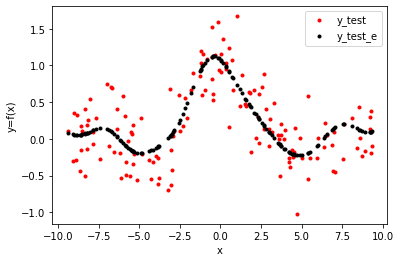

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import Pipeline
gamma = 0.1 #gamma
alpha = 0.001 # valor de regularización
reg = KernelRidge(kernel='rbf',gamma=gamma, alpha = alpha)
reg.fit(X_train,y_train) #ajustar solo sobre train
#prediccion
y_test_e = reg.predict(X_test)
y_train_e = reg.predict(X_train)

plt.plot(X_test,y_test,'r.',label='y_test' )
plt.plot(X_test,y_test_e,'k.',label='y_test_e')
plt.legend()
plt.xlabel('x')
plt.ylabel('y=f(x)')
plt.show()

- Es  necesario encontar unos buenos hiperparámetros para seguir la función no lineal

In [ ]:
steps=[('reg', KernelRidge(kernel = 'rbf'))]
parameters = {'reg__alpha' : [0,1e-3,1e-2,0.1,1,10,100,1000],              
              'reg__gamma': [1e-4,1e-3,1e-2,0.1,1,10,100,1000],
              }

pipeline = Pipeline(steps = steps)

grid_search = GridSearchCV(pipeline, parameters, n_jobs=4,cv=10,
                           scoring='neg_mean_absolute_error',verbose=10,refit=True)

grid_search.fit(X_train, y_train)
#mejor modelo entrenado
best_model = grid_search.best_estimator_

print("\nMejores parámetros:\n")
print(grid_search.best_params_)

Fitting 10 folds for each of 64 candidates, totalling 640 fits

Mejores parámetros:

{'reg__alpha': 1, 'reg__gamma': 0.1}


- Se evaluan los datos de test y train con el mejor modelo encontrado

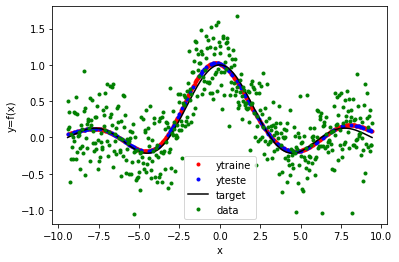

In [ ]:
y_test_e = grid_search.best_estimator_.predict(X_test)
y_train_e = grid_search.best_estimator_.predict(X_train)
plt.plot(X_train,y_train_e,'r.',label='ytraine' )
plt.plot(X_test,y_test_e,'b.',label='yteste')
plt.plot(X,y,'k',label='target' )
plt.plot(Xdata,ydata,'g.',label='data' )
plt.legend()
plt.xlabel('x')
plt.ylabel('y=f(x)')
plt.show()

- Visualicemos la función kernel:

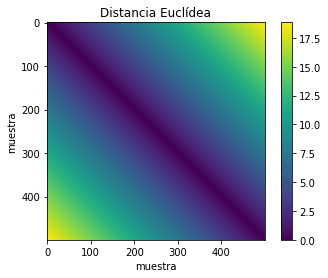

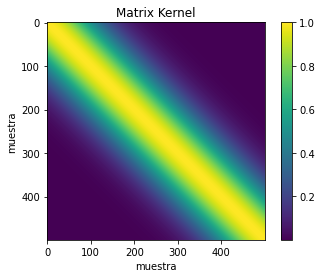

In [ ]:
from sklearn.metrics import pairwise_distances as dist

D = dist(X.reshape(-1,1),X.reshape(-1,1)) #disimilitud
K = np.exp(-.5*gamma*D**2)
D.shape
plt.imshow(D)
plt.colorbar()
plt.xlabel('muestra')
plt.ylabel('muestra')
plt.title('Distancia Euclídea')
plt.show()

plt.imshow(K)
plt.colorbar()
plt.xlabel('muestra')
plt.ylabel('muestra')
plt.title('Matrix Kernel')
plt.show()

Recuerde que:

\begin{equation}
\kappa(x,x') = \frac{1}{\sqrt{2\pi \sigma^2}}\exp\left(\frac{-\|x-x'\|_2^2}{2\sigma^2}\right) = \frac{1}{\sqrt{2\pi \sigma^2}}\exp\left(\frac{-\gamma\|x-x'\|_2^2}{2}\right) 
\end{equation}

#Ejercicio 2 

- Visualice el kernel rbf para diferentes condiciones de ruido sintonizando los hiperparámetros del modelo utilizando gridsearch. *Ayuda*: modifique la varianza del ruido.

- Realice una descomposición en valores propios de la matriz kernel para cada una de las condiciones de ruido del punto anterior, qué puede discutir sobre el espectro de la matríz y su influencia en el modelo predictivo de kernel ridge?. Cuál es la relación entre el espectro visualizado y el hiperparámetro de regularización o penalidad encontrado por gridsearch en cada caso?. *Ayuda*: utilizando numpy encuentre la descomposición de valores y vectores propios de $\mathbf{K}$ y $\mathbf{K}+\alpha\mathbf{I}$, según los valores de $\gamma$ y $\alpha$ encontrados por GridsearchCV ante cada condición de ruido evaluada.




## Solución Ejercicio 2

In [ ]:
varN=[5,2.5,1,0.5,0.25,0.1,0.05]
len(varN)

7

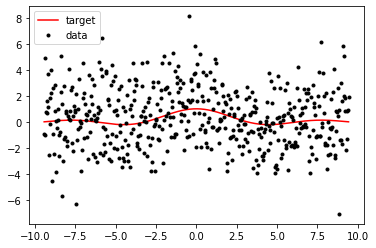

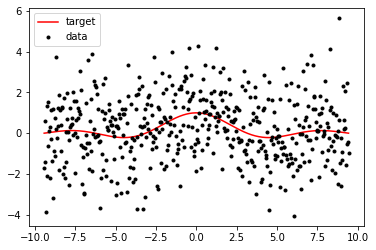

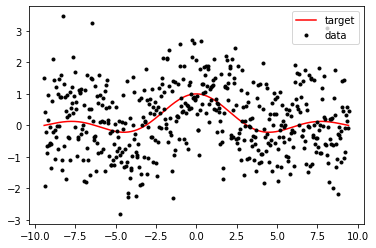

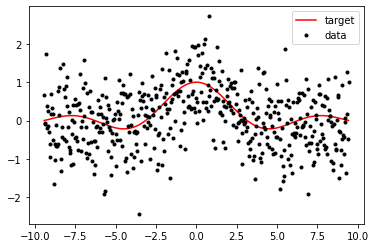

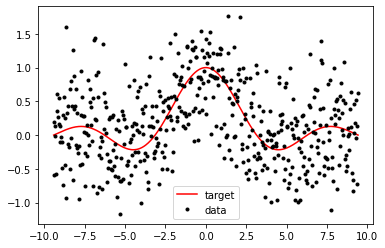

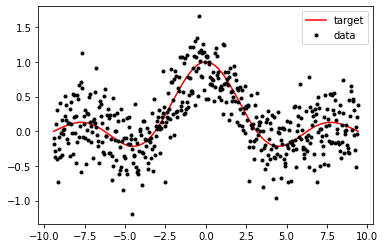

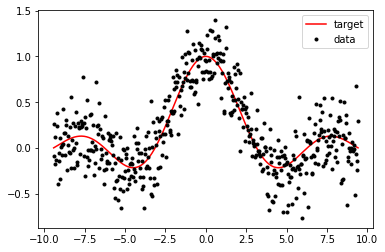

In [ ]:
N = 500 #número de muestras
yn = np.zeros((len(varN),N))
X = np.linspace(-3*np.pi,3*np.pi,N) #vector de entrada 
y = np.sinc(X/np.pi) #función sinc -> objetivo
for i in range(len(varN)):
  var = varN[i]  #varianza del ruido
  mue = 0  #media del ruido
  noise = mue + np.sqrt(var)*np.random.randn(X.shape[0])#ruido blanco
  yn[i,:] = y + noise  #señal co ruido
  plt.plot(X,y,'r',label='target' )
  plt.plot(X,yn[i,:],'k.',label='data')
  plt.legend()
  plt.show()

Fitting 10 folds for each of 64 candidates, totalling 640 fits

 

varianza 5
Mejores parámetros:

{'reg__alpha': 10, 'reg__gamma': 10}


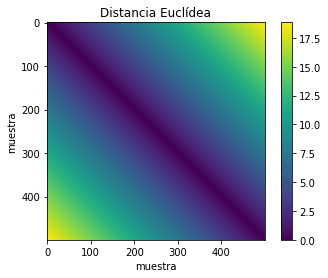

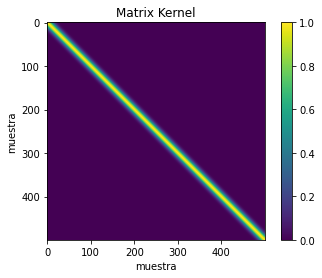

Fitting 10 folds for each of 64 candidates, totalling 640 fits

 

varianza 2.5
Mejores parámetros:

{'reg__alpha': 10, 'reg__gamma': 0.1}


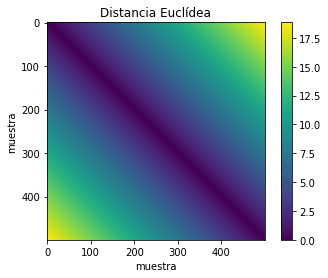

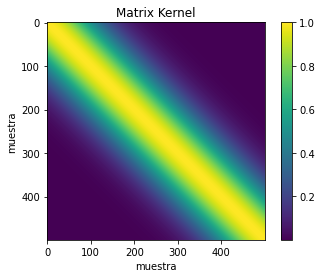

Fitting 10 folds for each of 64 candidates, totalling 640 fits

 

varianza 1
Mejores parámetros:

{'reg__alpha': 0.001, 'reg__gamma': 0.1}


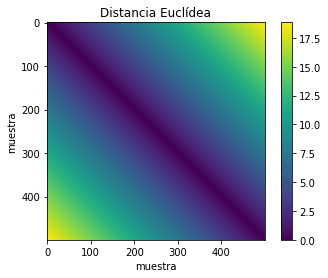

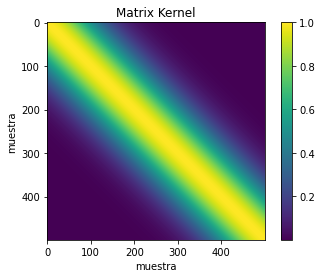

Fitting 10 folds for each of 64 candidates, totalling 640 fits

 

varianza 0.5
Mejores parámetros:

{'reg__alpha': 1, 'reg__gamma': 0.1}


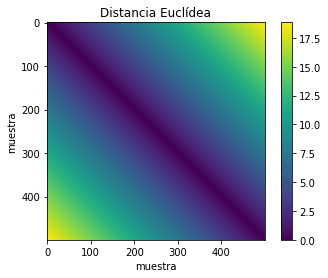

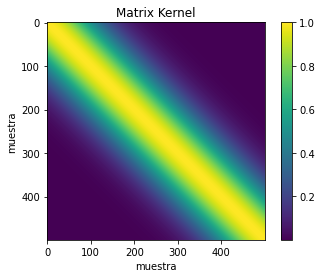

Fitting 10 folds for each of 64 candidates, totalling 640 fits

 

varianza 0.25
Mejores parámetros:

{'reg__alpha': 1, 'reg__gamma': 0.1}


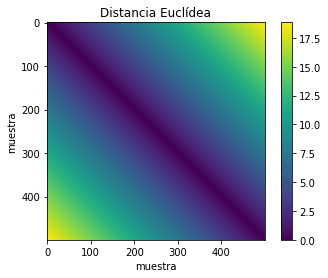

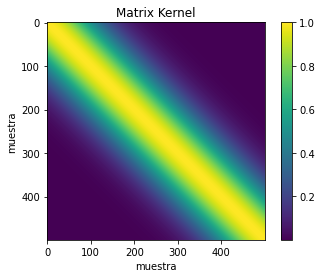

Fitting 10 folds for each of 64 candidates, totalling 640 fits

 

varianza 0.1
Mejores parámetros:

{'reg__alpha': 1, 'reg__gamma': 0.1}


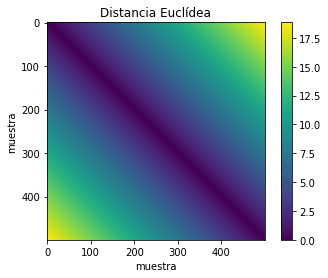

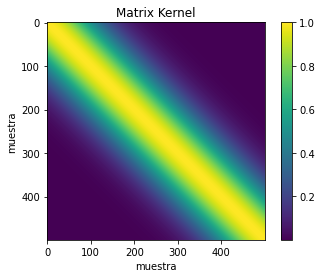

Fitting 10 folds for each of 64 candidates, totalling 640 fits

 

varianza 0.05
Mejores parámetros:

{'reg__alpha': 1, 'reg__gamma': 0.1}


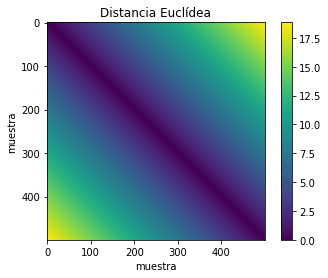

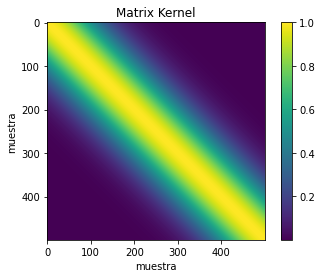

In [ ]:
Xdata = X.reshape(-1,1) #N=500, P= 1
y = y.reshape(-1,1)
for i in range(len(varN)):
  ydata = yn[i,:].reshape(-1,1)
  X_train, X_test, y_train, y_test = train_test_split(Xdata, ydata,
                                                    test_size=0.3,random_state=43)#particionar train y test
  steps=[('reg', KernelRidge(kernel = 'rbf'))]
  parameters = {'reg__alpha' : [0,1e-3,1e-2,0.1,1,10,100,1000],              
                'reg__gamma': [1e-4,1e-3,1e-2,0.1,1,10,100,1000],
                }

  pipeline = Pipeline(steps = steps)

  grid_search = GridSearchCV(pipeline, parameters, n_jobs=4,cv=10,
                            scoring='neg_mean_absolute_error',verbose=10,refit=True)  
  grid_search.fit(X_train, y_train)
  ##grafico
  gamma= grid_search.best_params_['reg__gamma']
  alfa=grid_search.best_params_['reg__alpha']
  K = np.exp(-.5*gamma*D**2)
  Kalpha = K + alpha*np.eye(N)
  val,vec = np.linalg.eig(K)
  val_a,vec_a = np.linalg.eig(Kalpha)
  D.shape
   #mejor modelo entrenado
  best_model = grid_search.best_estimator_
  print("\n \n")
  print("varianza",varN[i])
  print("Mejores parámetros:\n")
  print(grid_search.best_params_)
  plt.imshow(D)
  plt.colorbar()
  plt.xlabel('muestra')
  plt.ylabel('muestra')
  plt.title('Distancia Euclídea')
  plt.show()
  plt.imshow(K)
  plt.colorbar()
  plt.xlabel('muestra')
  plt.ylabel('muestra')
  plt.title('Matrix Kernel')
  plt.show()
  ##

El alpha es un filtro y aumenta con la varianza de el gamma, aunque teóricamente tiene una relación inversa con la varianza, también depende del valor de alpha

Fitting 10 folds for each of 64 candidates, totalling 640 fits
varianza 5
Mejores parámetros:

{'reg__alpha': 10, 'reg__gamma': 10}


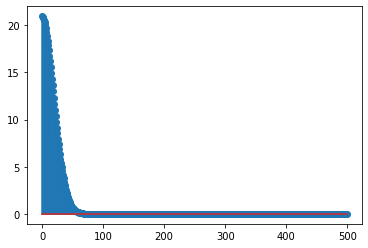

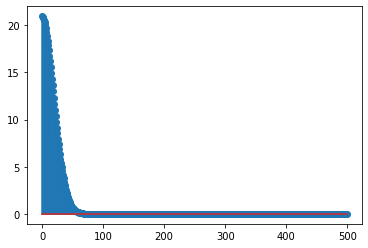

Fitting 10 folds for each of 64 candidates, totalling 640 fits
varianza 2.5
Mejores parámetros:

{'reg__alpha': 10, 'reg__gamma': 0.1}


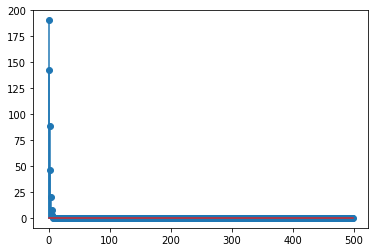

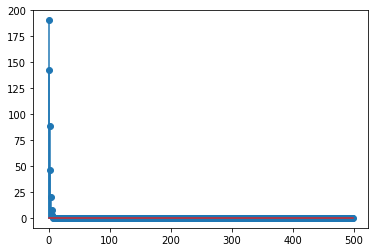

Fitting 10 folds for each of 64 candidates, totalling 640 fits
varianza 1
Mejores parámetros:

{'reg__alpha': 0.001, 'reg__gamma': 0.1}


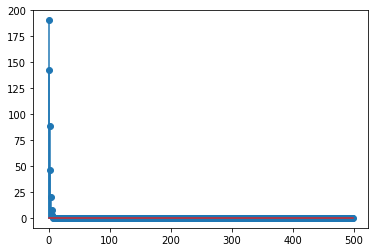

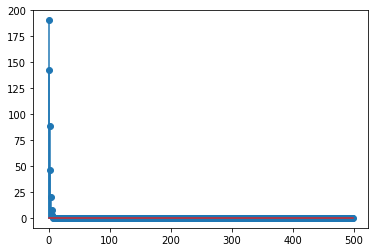

Fitting 10 folds for each of 64 candidates, totalling 640 fits
varianza 0.5
Mejores parámetros:

{'reg__alpha': 1, 'reg__gamma': 0.1}


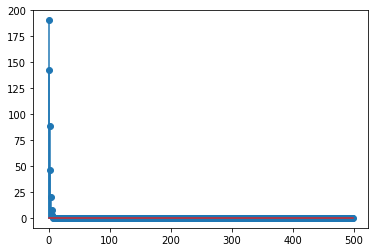

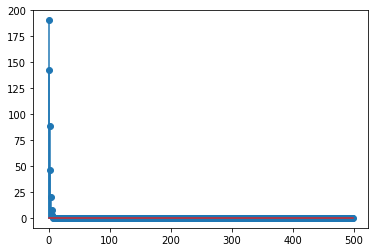

Fitting 10 folds for each of 64 candidates, totalling 640 fits
varianza 0.25
Mejores parámetros:

{'reg__alpha': 1, 'reg__gamma': 0.1}


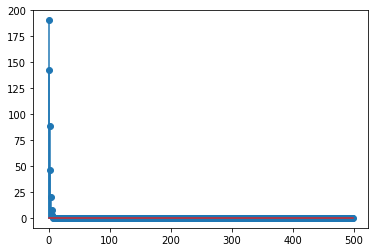

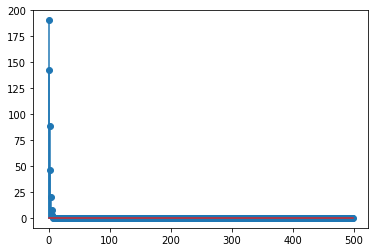

Fitting 10 folds for each of 64 candidates, totalling 640 fits
varianza 0.1
Mejores parámetros:

{'reg__alpha': 1, 'reg__gamma': 0.1}


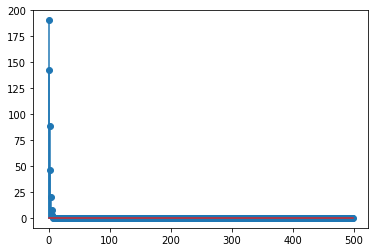

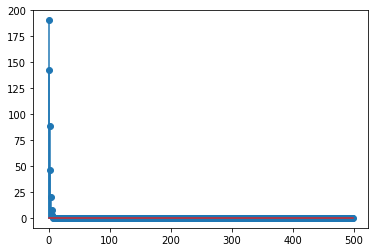

Fitting 10 folds for each of 64 candidates, totalling 640 fits
varianza 0.05
Mejores parámetros:

{'reg__alpha': 1, 'reg__gamma': 0.1}


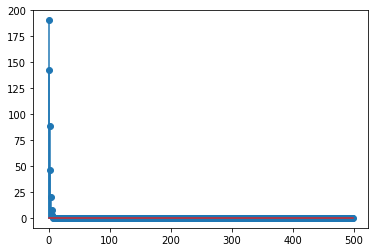

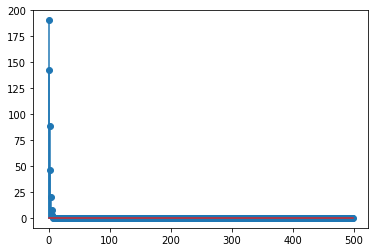

In [ ]:
Xdata = X.reshape(-1,1) #N=500, P= 1
y = y.reshape(-1,1)
for i in range(len(varN)):
  ydata = yn[i,:].reshape(-1,1)
  X_train, X_test, y_train, y_test = train_test_split(Xdata, ydata,
                                                    test_size=0.3,random_state=43)#particionar train y test
  steps=[('reg', KernelRidge(kernel = 'rbf'))]
  parameters = {'reg__alpha' : [0,1e-3,1e-2,0.1,1,10,100,1000],              
                'reg__gamma': [1e-4,1e-3,1e-2,0.1,1,10,100,1000],
                }

  pipeline = Pipeline(steps = steps)

  grid_search = GridSearchCV(pipeline, parameters, n_jobs=4,cv=10,
                            scoring='neg_mean_absolute_error',verbose=10,refit=True)  
  grid_search.fit(X_train, y_train)
  ##grafico
  gamma= grid_search.best_params_['reg__gamma']
  alfa=grid_search.best_params_['reg__alpha']
  K = np.exp(-.5*gamma*D**2)
  Kalpha = K + alpha*np.eye(N)
  val,vec = np.linalg.eig(K)
  val_a,vec_a = np.linalg.eig(Kalpha)
  print("\n \n")
  print("varianza",varN[i])
  print("Mejores parámetros:\n")
  print(grid_search.best_params_)
  plt.stem(val)
  plt.show()
  plt.stem(val_a)
  plt.show()

Se aprecia que a medida que aumenta el alpha, es como si la gráfica de valores propios se desplazada hacia arrriba, mientras que, a mayor valor de gamma los valores propios caen más lentamente